# 1. Бейглз

В дедуктивной логической игре «Бейглз» необходимо по
подсказкам угадать секретное число из трех цифр. В ответ на ваши попытки угадать игра выдает одну из трех подсказок: **Pico**, если вы угадали правильную цифру на
неправильном месте, **Fermi**, если в вашей догадке есть правильная цифра на правильном месте, и **Bagels**, если в догадке
не содержится правильных цифр. На угадывание секретного
числа у вас десять попыток

In [ ]:
import random

# Всего будет цифр
num_digits = 3

# Макс кол-во угадываний
max_guesses = 10

# главная функция
def main():
  print(f"""Bagels, a deductive logic game.
Описание работы:

Я думаю о числе из {num_digits} цифр, которые не повторяются.
Попробуй угадать это число. Вот правила:
Что я скажу: Что это значит:
'Попал' Угадал одну цифру, но её позиция неправильная.
'Точно' Угадал одну цифру на своей позиции.
'Мимо' Не угадал ни одной цифры.

Для примера, если я придумал число 248 а ты загадал 843, то ты увидишь:
Точно Попал.""")

  while True:
    # Генерируем секретное число
    secretnum = getsecretnum()
    print(f'Я придумал число. У тебя есть {max_guesses} попыток чтобы угадать его.')

    # Сейчас 1 попытка
    num_guesses = 1
    # Пока количество попыток не превысило максимум идем по циклу
    while num_guesses <= max_guesses:
      guess = ''
      # Просим угадать число, и проверяем на правильность введенных данных
      while len(guess) != num_digits or not guess.isdecimal():
        print(f'Попытка #{num_guesses}')
        guess = input('> ')

      # Угадал / не угадал и сколько
      clues = getClues(guess, secretnum)
      print(clues)
      num_guesses += 1

      # Обрываем весь цикл если угадал число
      if guess == secretnum: break
      # Если кончились попытки - конец
      if num_guesses > max_guesses:
        print('Попытки кончились.')
        print(f'А я загадл число {secretnum}')

    # После конца игры - предлагаем сыграть еще
    print('Хочешь сыграем еще раз? (Y или N)')
    if not input('> ').lower().startswith('y'):
      break
    print('Спасибо за игру!')


# Генератор секретного число
def getsecretnum():
  """Возвращает строку из num_digits уникальных случайных цифр."""
  numbers = list('0123456789') # Создает список цифр от 0 до 9.
  random.shuffle(numbers) # Перетасовываем их случайным образом.

  # Берем первые NUM_DIGITS цифр списка для нашего секретного числа:
  secretnum = ''
  for i in range(num_digits):
    secretnum += str(numbers[i])
  return secretnum


# Проверка на "угадывание" + подсказка
def getClues(guess, secretnum):
  """Возвращает строку с подсказками pico, fermi и bagels
  для полученной на входе пары из догадки и секретного числа."""

  if guess == secretnum:
    return 'Все верно, ты угадал задуманное число'

  # Список для хранения подсказок
  clues = []

  for i in range(len(guess)):
    if guess[i] == secretnum[i]:
      clues.append('Точно')
    elif guess[i] in secretnum:
      clues.append('Попал')
  if len(clues) == 0:
    return 'Мимо'
  else:
    # Сортируем подсказки в алфавитном порядке, чтобы их исходный
    # порядок ничего не выдавал.
    clues.sort()

    # Склеиваем список подсказок в одно строковое значение.
    return ' '.join(clues)


main()

Bagels, a deductive logic game.
Описание работы:

Я думаю о числе из 3 цифр, которые не повторяются.
Попробуй угадать это число. Вот правила:
Что я скажу: Что это значит:
'Попал' Угадал одну цифру, но её позиция неправильная.
'Точно' Угадал одну цифру на своей позиции.
'Мимо' Не угадал ни одной цифры.

Для примера, если я придумал число 248 а ты загадал 843, то ты увидишь:
Точно Попал.
Я придумал число. У тебя есть 10 попыток чтобы угадать его.
Попытка #1
> 123
Мимо
Попытка #2
> 456
Попал
Попытка #3
> 478
Точно
Попытка #4
> 698
Попал
Попытка #5
> 579
Попал Попал Точно
Попытка #6
> 9755
Попытка #6
> 975
Все верно, ты угадал задуманное число
Хочешь сыграем еще раз? (Y или N)
> твыа


# 2 Парадокс дней рождения

Парадокс дней рождения, также известный как задача
о днях рождения, заключается в удивительно высокой
вероятности того, что у двух человек совпадает день рождения даже в относительно небольшой группе людей.

В группе из 70 человек вероятность совпадения дней рождения у двух людей составляет 99,9 %. Но даже в группе всего
лишь из 23 человек вероятность совпадения дней рождения
составляет 50 %.

Приведенная программа производит несколько вероятностных
экспериментов, чтобы определить процентные соотношения для групп различного
размера.

Подобные эксперименты с определением возможных исходов с помощью
множества случайных испытаний называются экспериментами Монте-Карло.

Узнать больше о парадоксе дней рождения можно в соответствующей статье «Википедии»: https://ru.wikipedia.org/wiki/Парадокс_дней_рождения.

In [ ]:
import datetime, random

def getBirthdays(numberOfBurthdays):
  """Возвращаем список объектов дат для случайных дней рождения."""
  # храним все дни рождения
  birthdays = []
  for i in range(numberOfBurthdays):
    # Дата начала отсчета
    startOfYear = datetime.date(2001, 1, 1)
    # Получаем случайное число в формате datetime
    randomNumberOfDays = datetime.timedelta(random.randint(0,364))
    # Складываем с датой отсчета, получая случайную дату рождения
    birthday = startOfYear + randomNumberOfDays
    birthdays.append(birthday)
  return birthdays


def getMatch(birthdays):
  """ Возвращаем объект даты дня рождения, встречающегося
  несколько раз в списке дней рождения."""
  if len(birthdays) == len(set(birthdays)):
    return None # Все дни рождения различны, возвращаем None.

  # Сравниваем ДР друг с другом попарно
  for a, birthdayA in enumerate(birthdays):
    for b, birthdayB in enumerate(birthdays[a+1:]):
      if birthdayA == birthdayB:
        return birthdayA # Возвращаем найденное соответствие


# Отображаем вводную информацию:
print('''
Парадокс дней рождения показывает нам, что в группе из N человек вероятность того,
что у двоих из них совпадают дни рождения, удивительно высока.

Эта программа выполняет симуляцию Монте-Карло (то есть повторные случайные симуляции).''')
print()

# Создаем кортеж названий месяцев по порядку:
MONTHS = tuple(datetime.date(2000, month, 1).strftime('%b') for month in range(1, 13))

while True: # Запрашиваем, пока пользователь не введет допустимое значение.
  print('Группу из скольки человек проверим? (больше 100 не смогу)')
  response = input('> ')
  if response.isdecimal() and (0 < int(response) <= 100):
    numBDays = int(response)
    break # Пользователь ввел допустимое значение

print()

# Генерируем и отображаем дни рождения:
print('Берем группу из:', numBDays, 'человек, пусть все их дни рождения в разные даты:')
# Создаем нужное кол-во случайных дней рождения
birthdays = getBirthdays(numBDays)
# Выведем им для ознакомления пользователя
for i, birthday in enumerate(birthdays):
  if i != 0:
    print(', ', end='')
  monthName = MONTHS[birthday.month - 1]
  dateText = f'{monthName} {birthday.day}'
  if i%10 == 0: print()
  print(dateText, end='')

print()
print()

# Выясняем, встречаются ли два совпадающих дня рождения.
match_ = getMatch(birthdays)

# Отображаем результаты:
print('В самой первой симуляции, ', end='')
if match_ != None:
  monthName = MONTHS[match_.month - 1]
  dateText = f'{monthName} {match_.day}'
  print('Самые первые дни рождения совпали в дату', dateText)
else:
  print('Совпадений дней рождений не было.')
print()

# Производим 100_000 операций имитационного моделирования
print('Теперь мы сгенерируем', numBDays, 'случайных дней рождения 100,000 раз...')
print('Посмотрим сколько раз за симуляцию найдутся люди с одинаковой датой рождения.')
input('Нажмите Enter и я начну...')

print('Провожу очередные 100_000 симуляций.')
simMatch = 0 # Число операций моделирования с совпадающими днями рождения.
for i in range(100_000):
  # Отображаем сообщение о ходе выполнения каждые 10 000 операций:
  if i % 10_000 == 0:
    print(i, 'simulation run...')
  birthdays = getBirthdays(numBDays)
  if getMatch(birthdays) != None:
    simMatch += 1
print('100_000 simulations run')

# Отображаем результаты имитационного моделирования:
probability = round(simMatch / 100_000 * 100, 2)
print('За 100_000 симуляций',numBDays,'дней рождений, нашлось')
print(simMatch, 'людей с одинаковой датой рождения.')
print('Это означает, что для группы из',numBDays, 'человек. шанс совпадения дня рождения =',probability,'%')


Парадокс дней рождения показывает нам, что в группе из N человек вероятность того, 
что у двоих из них совпадают дни рождения, удивительно высока.

Эта программа выполняет симуляцию Монте-Карло (то есть повторные случайные симуляции).

Группу из скольки человек проверим? (больше 100 не смогу)
> 166

Берем группу из: 166 человек, пусть все их дни рождения в разные даты:

Mar 8, Nov 9, Jul 29, Sep 2, Aug 16, Mar 27, Oct 10, Mar 8, Jul 18, May 5, 
May 13, Jun 24, Nov 23, Apr 22, Jul 26, Nov 26, Nov 24, Feb 13, Jan 27, Mar 31, 
Oct 27, Aug 11, Apr 24, Nov 28, Mar 11, Aug 20, Dec 1, Nov 22, Jun 10, Jul 2, 
Jan 18, Sep 10, Aug 28, Jun 6, Aug 8, Sep 19, Aug 15, Dec 30, Mar 15, Jun 29, 
May 17, May 25, Dec 3, Dec 27, May 25, Feb 1, Oct 2, Jan 27, May 7, Feb 4, 
Jan 18, Aug 10, Sep 5, Dec 5, Apr 27, Sep 20, Oct 6, Nov 23, Aug 18, May 11, 
Jan 25, Jun 19, Aug 21, Mar 7, Sep 11, Sep 16, Mar 7, Jan 3, Aug 25, May 26, 
May 23, May 13, Jun 12, Aug 11, Aug 9, Mar 7, Feb 5, Sep 27, Jul 27, Jul 23, 
N

# 3 Моделирование лесных пожаров

В данной программе мы моделируем лес, деревья в кото-
ром непрерывно растут, а затем сгорают. На каждом этапе

моделирования существует равная 1 % вероятность того,

что на пустом месте вырастет дерево, а также 1 % вероятно-
сти того, что в дерево попадет молния и оно сгорит. Пожары

распространяются на непосредственно прилегающие к нему
деревья, поэтому более густой лес скорее пострадает от сильного
пожара, чем разреженный.

**Описание работы**


Эта программа — пример эмерджентного поведения, при котором взаимодействие
между простыми составляющими системы приводит к сложным закономерностям.

На пустых местах вырастают деревья, молнии их поджигают, а огонь превращает
деревья обратно в пустое пространство, распространяясь при этом на соседние
деревья. Подбирая различную скорость роста деревьев и частоту ударов молний,
вы можете добиться различных явлений.

Например, низкая вероятность удара молнии и высокая скорость роста приводят к обширным постоянным лесным по-
жарам, поскольку деревья располагаются кучно и быстро вырастают снова. Низкая же скорость роста деревьев при высокой вероятности ударов молний приводит
к возникновению нескольких маленьких пожаров, быстро потухающих из-за
отсутствия деревьев поблизости.

In [143]:
class ForestiInFire():
    import random
    import numpy as np
    import matplotlib.axes
    import matplotlib.pyplot as plt
    from typing import List, Dict, Tuple
    from shapely.geometry import Polygon, Point
    from matplotlib.patches import Circle, Rectangle 
    
    def __init__(self,
             count_lakes: int = 4,
             color_lakes: str = 'blue',
             city_square: int = 50,
             city_color: str = 'black',
             TREE: str = '/\\',
             FIRE: str = 'W',
             EMPTY: str = ' ',
             INITIAL_TREE_DENSITY: float = 0.5,
             GROW_CHANCE: float = 0.05,
             another_simulations: int = 3,
             FIRE_CHANCE: float = 0.05) -> None:
        """
        Инициализирует новый экземпляр класса ForestiInFire.

        Параметры:
        count_lakes (int): Количество озер в окружении.
        color_lakes (str): Цвет озер.
        city_square (int): Размер города (квадрата).
        city_color (str): Цвет города.
        TREE (str): Символ, представляющий дерево.
        FIRE (str): Символ, представляющий огонь.
        EMPTY (str): Символ, представляющий пустое место.
        INITIAL_TREE_DENSITY (float): Начальная плотность деревьев в лесу.
        GROW_CHANCE (float): Вероятность роста деревьев.
        another_simulations (int): Количество дополнительных симуляций.
        FIRE_CHANCE (float): Вероятность возникновения пожара.
        """
        self.count_lakes = count_lakes
        self.color_lakes = color_lakes
        self.city_square = city_square
        self.city_color = city_color
        self.WIDTH = 150
        self.HEIGHT = 150
        self.TREE = TREE
        self.FIRE = FIRE
        self.EMPTY = EMPTY
        self.INITIAL_TREE_DENSITY = INITIAL_TREE_DENSITY
        self.GROW_CHANCE = GROW_CHANCE
        self.FIRE_CHANCE = FIRE_CHANCE
        self.PAUSE = 2
        self.another_simulations = another_simulations


    def main(self):
        """
        Запускает основной процесс симуляции пожара в лесу.

        Создает новый графический объект для отображения симуляции,
        устанавливает границы осей, вызывает методы для создания окружения,
        леса и озер, отображает результаты симуляции и показывает рисунок.

        Параметры:
        self: экземпляр класса ForestInFire.

        Возвращает:
        None.
        """
        _, ax = self.plt.subplots()
        ax.set_xlim(-150, 150)
        ax.set_ylim(-150, 150)
        ax.axis(False)

        square_polygon = self.draw_city(ax)
        circle_rad_center = self.draw_lake(ax, square_polygon=square_polygon)
        forest = self.create_new_forest(circle_rad_center, square_polygon)
        self.draw_forest(ax, forest)
        ax.text(-90, 165, 'Симуляция 0', fontsize=10, color='black', ha='right', va='top')
        self.plt.show()
        self.plt.pause(2)
        self.simulation(ax, square_polygon, circle_rad_center, forest)


    def draw_environment(self,
                     ax: matplotlib.axes.Axes,
                     square_polygon: Polygon,
                     circle_rad_center: List[Tuple[float, Tuple[float, float]]]) -> None:
        """
        Рисует окружение на графике.

        Параметры:
        self: экземпляр класса ForestInFire.
        ax: объект графика, на который будут нарисованы элементы окружения.
        square_polygon (Polygon): многоугольник, представляющий город.
        circle_rad_center (list(tuple)): список кортежей, каждый содержит радиус и центр озера.

        Возвращает:
        None.
        """
        # Рисуем окружности
        for rad, center in circle_rad_center:
            circle = self.plt.Circle(center, rad, color=self.color_lakes)
            ax.add_artist(circle)

        # Рисуем квадрат
        x, y = square_polygon.exterior.xy
        S_ = x[2] - x[0]
        C_ = S_//3
        square = self.plt.Rectangle((x[0], y[0]), S_, S_, color=self.city_color, alpha=0.8)
        ax.add_patch(square)

        # Рисуем маленькие квадраты
        for i in range(2):
            for j in range(2):
                subquare_x = x[0] + i * (S_ - C_)
                subquare_y = y[0] + j * (S_ - C_)
                subquare = self.plt.Rectangle((subquare_x, subquare_y), C_, C_,
                                        color=self.city_color, alpha=0.5)
                ax.add_patch(subquare)


    def simulation(self,
               ax: matplotlib.axes.Axes,
               square_polygon: Polygon,
               circle_rad_center: List[Tuple[float, Tuple[float, float]]],
               forest: Dict[Tuple[int, int], str],
               s: int = 0) -> None:
        """
        Проводит симуляцию распространения пожара в лесу.

        Параметры:
        self: экземпляр класса ForestInFire.
        ax: объект графика, на котором отображается симуляция.
        square_polygon (Polygon): многоугольник, представляющий город.
        circle_rad_center (list(tuple)): список кортежей, каждый содержит радиус и центр озера.
        forest (dict): словарь, представляющий текущее состояние леса.
        s (int): номер текущей симуляции (по умолчанию 0).

        Возвращает:
        None.
        """
        for _ in range(self.another_simulations):
            next_forest = forest.copy()
            for (x, y), value in forest.items():
                if value == self.EMPTY and self.random.random()*10 <= self.GROW_CHANCE:
                    next_forest[(x, y)] = self.TREE
                elif value == self.TREE and self.random.random()*10 <= self.FIRE_CHANCE:
                    next_forest[(x, y)] = self.FIRE
                elif value == self.FIRE:
                    for ix in range(-3, 4):
                        for iy in range(-3, 4):
                            if forest.get((x + ix, y + iy)) == self.TREE:
                                next_forest[(x + ix, y + iy)] = self.FIRE
                    next_forest[(x, y)] =self.EMPTY
            forest = next_forest

            # Отрисовка состояния леса на каждой итерации
            fig, ax = self.plt.subplots()
            ax.set_xlim(-150, 150)
            ax.set_ylim(-150, 150)
            ax.axis(False)
            self.draw_environment(ax, square_polygon, circle_rad_center)
            self.draw_forest(ax, forest)
            s+=1
            ax.text(-90, 165, f'Симуляция {s}', fontsize=10, color='black', ha='right', va='top')
            self.plt.pause(0.5)  # Пауза для отображения состояния перед следующей итерацией
        inp = input('Хотите симулировать еще раз?\n> ')
        if inp.isdigit():
            self.another_simulations = int(inp)
            self.simulation(ax, square_polygon,
                                    circle_rad_center, forest, s=s)
        else: print('Спасибо, приходите к нам еще!')


    def draw_forest(self,
                ax: matplotlib.axes.Axes,
                forest: Dict[Tuple[int, int], str]) -> None:
        """
        Отображает лес на графике.

        Параметры:
        self: экземпляр класса ForestInFire.
        ax: объект графика, на котором будет отображен лес.
        forest (dict): словарь, представляющий текущее состояние леса.

        Возвращает:
        None.
        """
        for key_, val_ in forest.items():
            if val_ == '/\\':
                ax.plot(key_[0], key_[1], c="green", marker="^")  # Отрисовка деревьев
            elif val_ == 'W':
                ax.plot(key_[0], key_[1], c="red", marker="x")  # Отрисовка огня

    
    def create_new_forest(self,
                      circle_rad_center: List[Tuple[float, Tuple[float, float]]],
                      square_polygon: Polygon) -> Dict[Tuple[int, int], str]:
        """
        Создает новый первоначальный лес на основе заданных параметров окружения.

        Параметры:
        self: экземпляр класса ForestInFire.
        circle_rad_center (list(tuple)): список кортежей, каждый содержит радиус и центр озера.
        square_polygon (Polygon): список кортежей, представляющий вершины многоугольника, описывающего город.

        Возвращает:
        forest (dict): словарь, представляющий новый лес с деревьями.
        """
        # Извлекаем радиусы и центры кругов
        rads = [rad for rad, _ in circle_rad_center]
        centers = [center for _, center in circle_rad_center]
        # Создаем множество координат всех точек
        all_points = {(x, y) for x in range(-self.WIDTH, self.WIDTH) for y in range(-self.HEIGHT, self.HEIGHT)
        if  not square_polygon.contains(self.Point(x,y))}
        # Удаляем точки, находящиеся внутри каждого круга
        for center, rad in zip(centers, rads):
            all_points -= {(x, y) for x, y in all_points if (x - center[0])**2 + (y - center[1])**2 <= rad**2}
        # Создаем лес, изначально все точки пустые
        forest = {point: self.EMPTY for point in all_points}
        # Добавляем деревья согласно начальной плотности
        for point in forest:
            if self.random.random()*10 <= self.INITIAL_TREE_DENSITY:
                forest[point] = self.TREE
        return forest
    

    def draw_city(self,
                  ax: matplotlib.axes.Axes) -> Polygon:
        """
        Рисует город на заданном графике.

        Параметры:
        self: экземпляр класса ForestInFire.
        ax: объект графика, на котором будет отображен город.

        Возвращает:
        square_polygon (Polygon): объект Polygon, представляющий границы города.
        """
        # Размер маленьких квадратов
        color = self.city_color
        S_ = self.city_square
        C_ = S_ // 3
        # Генерация случайной координаты для большого квадрата
        x = self.random.randint(-150, 150 - S_)
        y = self.random.randint(-150, 150 - S_)

        # Нарисовать большой квадрат
        square = self.plt.Rectangle((x, y), S_, S_, color=color, alpha=0.8)
        ax.add_patch(square)

        for i in range(2):
            for j in range(2):
                subquare_x = x + i * (S_ - C_)
                subquare_y = y + j * (S_ - C_)
                subquare = self.plt.Rectangle((subquare_x, subquare_y), C_, C_,
                                        color=color, alpha=0.5)
                ax.add_patch(subquare)

        # Создаем объект Polygon для представления квадрата
        square_polygon = self.Polygon([(x, y),
                                    (x + S_, y),
                                    (x + S_, y + S_),
                                    (x, y + S_)])

        # Список для хранения точек внутри квадрата
        points_inside_square = []

        # Перебираем все точки в предполагаемой области, где может находиться вторая фигура
        for x_ in range(x, x + S_):
            for y_ in range(y, y + S_):
                point = self.Point(x_, y_)
                # Проверяем, находится ли точка внутри квадрата
                if square_polygon.contains(point):
                    points_inside_square.append((x_, y_))
        return square_polygon


    def draw_lake(self,
                  ax: matplotlib.axes.Axes,
                  square_polygon: Polygon) -> List[Tuple[float, Tuple[float, float]]]:
        """
        Рисует озеро(а) на заданном графике в колличестве self.count_lakes.

        Параметры:
        self: экземпляр класса ForestInFire.
        ax: объект графика, на котором будет отображено озеро.
        square_polygon (Polygon): список кортежей, представляющий вершины многоугольника, описывающего город (по умолчанию [(1,1)]).

        Возвращает:
        circle_rad_center (list(tuple)): список кортежей, каждый содержит радиус и центр озера.
        """
        import random
        from matplotlib.patches import Circle
        from shapely.geometry import Point
        color = self.color_lakes
        circle_rad_center = []

        # Извлекаем координаты вершин квадрата
        square_coords = self.np.array(square_polygon.exterior.coords)

        # Создаем список допустимых точек вне квадрата
        valid_points = []
        for x in range(-150, 150, 1):
            for y in range(-150, 150, 1):
                point = Point(x, y)
                if not square_polygon.contains(point):
                    valid_points.append((x, y))

        for _ in range(self.count_lakes):
            # Выбираем случайные координаты и радиус из списка допустимых точек
            while True:
                circle_center = random.choice(valid_points)
                random_lake_radius = random.choice(range(10, 50, 5))

                min_distance_from_edges = min([abs(circle_center[0] - edge[0]) for edge in square_coords] +
                [abs(circle_center[1] - edge[1]) for edge in square_coords])
                if min_distance_from_edges >= random_lake_radius:
                    # Рисуем круг в заданном месте
                    circle = Circle(circle_center, random_lake_radius, color=color)
                    circle_rad_center.append((random_lake_radius, circle_center))
                    ax.add_patch(circle)
                    break
        return circle_rad_center

In [ ]:
# Для запуска скрипта
# if __name__ == "__main__":
#     forest = ForestInFire(FIRE_CHANCE=0.9,
#                           INITIAL_TREE_DENSITY=0.5,
#                           GROW_CHANCE=0.001,
#                           another_simulations=1)
#     forest.main()

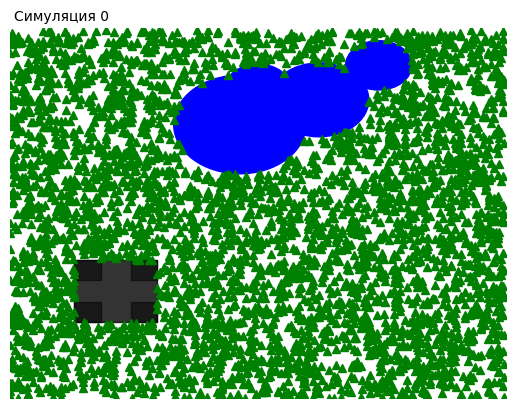

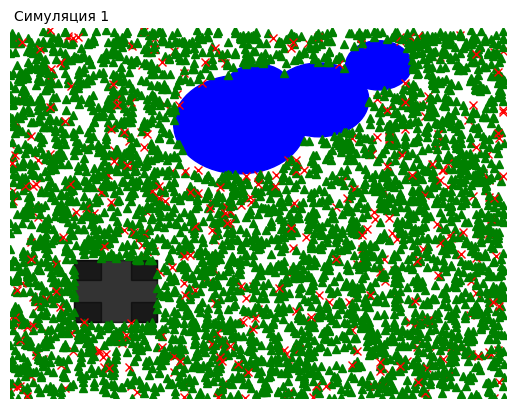

Спасибо, приходите к нам еще!


In [146]:
forest = ForestiInFire(FIRE_CHANCE=.9,
                       INITIAL_TREE_DENSITY = .5,
                       GROW_CHANCE = .001,
                       another_simulations=1)

forest.main()